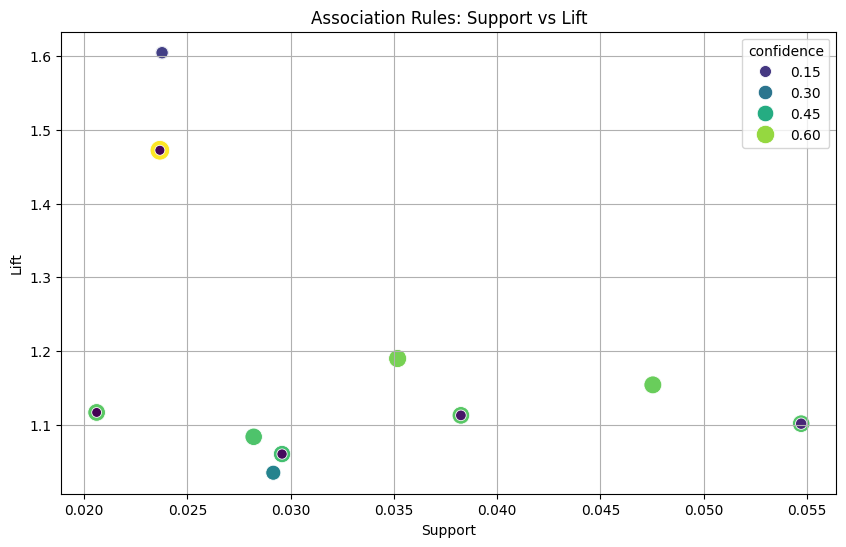

Top 10 Association Rules:
        antecedents      consequents   support  confidence      lift
0           (Bread)         (Pastry)  0.029160    0.089119  1.034977
1          (Pastry)          (Bread)  0.029160    0.338650  1.034977
2            (Cake)         (Coffee)  0.054728    0.526958  1.101515
3          (Coffee)           (Cake)  0.054728    0.114399  1.101515
4            (Cake)            (Tea)  0.023772    0.228891  1.604781
5             (Tea)           (Cake)  0.023772    0.166667  1.604781
6          (Coffee)        (Cookies)  0.028209    0.058966  1.083723
7         (Cookies)         (Coffee)  0.028209    0.518447  1.083723
8   (Hot chocolate)         (Coffee)  0.029583    0.507246  1.060311
9          (Coffee)  (Hot chocolate)  0.029583    0.061837  1.060311
10          (Juice)         (Coffee)  0.020602    0.534247  1.116750
11         (Coffee)          (Juice)  0.020602    0.043065  1.116750
12         (Coffee)      (Medialuna)  0.035182    0.073542  1.189878
13      

In [1]:
#lp17
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

# Step 1: Data Preprocessing
# Load the dataset

df = pd.read_csv('Oder3.csv')

# Generate transactions by grouping items by TransactionNo
transactions = df.groupby('TransactionNo')['Items'].apply(list).tolist()

# Step 2: Prepare the data for the Apriori algorithm
# Convert transactions into a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_onehot = pd.DataFrame(te_ary, columns=te.columns_)

# Step 3: Apply the Apriori Algorithm
# Set minimum support to find frequent itemsets (example: 0.02)
frequent_itemsets = apriori(df_onehot, min_support=0.02, use_colnames=True)

# Step 4: Apply Association Rules
# Apply the association rules with a minimum lift threshold of 1.
# Remove num_itemsets=None if error comes here , it is due to version of mlxtend
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=None)

# Step 5: Visualize the results using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='lift', size='confidence', hue='confidence', palette='viridis', sizes=(50, 200))
plt.title('Association Rules: Support vs Lift')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.grid(True)
plt.show()

# Print the top 10 association rules
print("Top 10 Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])